In [26]:
# from google.colab import files
# files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c playground-series-s4e11

 88% 4.00M/4.55M [00:00<00:00, 6.29MB/s]
100% 4.55M/4.55M [00:00<00:00, 5.09MB/s]


In [ ]:
!unzip playground-series-s4e11.zip

Archive:  playground-series-s4e11.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

# Reading and Understanding the data

> Finding the unique values, missing values, duplicates, skewness of the data, distribution of the data



In [ ]:
train_ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')

In [ ]:
train_ds.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [ ]:
# the dimension of the data
print(f'train_ds shape: {train_ds.shape}')
print(f'test_ds shape: {test_ds.shape}')

train_ds shape: (140700, 20)
test_ds shape: (93800, 19)


In [ ]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [ ]:
# summarise the data to get the idea about the overall data
train_ds.describe(include=['object', 'float64', 'int64'])

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,140700.000000,140700,140700,140700.000000,140700,140700,104070,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700,140696,140698,140700,140700.000000,140696.000000,140700,140700.000000
unique,NaN,422,2,NaN,98,2,64,NaN,NaN,NaN,NaN,NaN,36,23,115,2,NaN,NaN,2,NaN
top,NaN,Rohan,Male,NaN,Kalyan,Working Professional,Teacher,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Moderate,Class 12,No,NaN,NaN,No,NaN
freq,NaN,3178,77464,NaN,6591,112799,24906,NaN,NaN,NaN,NaN,NaN,38784,49705,14729,71138,NaN,NaN,70758,NaN
mean,70349.500000,NaN,NaN,40.388621,NaN,NaN,NaN,3.142273,2.998998,7.658636,2.944940,2.974404,NaN,NaN,NaN,NaN,6.252679,2.988983,NaN,0.181713
std,40616.735775,NaN,NaN,12.384099,NaN,NaN,NaN,1.380457,1.405771,1.464466,1.360197,1.416078,NaN,NaN,NaN,NaN,3.853615,1.413633,NaN,0.385609
min,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000,1.000000,5.030000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35174.750000,NaN,NaN,29.000000,NaN,NaN,NaN,2.000000,2.000000,6.290000,2.000000,2.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,0.000000
50%,70349.500000,NaN,NaN,42.000000,NaN,NaN,NaN,3.000000,3.000000,7.770000,3.000000,3.000000,NaN,NaN,NaN,NaN,6.000000,3.000000,NaN,0.000000
75%,105524.250000,NaN,NaN,51.000000,NaN,NaN,NaN,4.000000,4.000000,8.920000,4.000000,4.000000,NaN,NaN,NaN,NaN,10.000000,4.000000,NaN,0.000000


In [ ]:
# finding the missing values
print(f'Empty data in train_ds: \n{train_ds.isnull().sum()}')
print('**' * 30)
print(f'Empty data in test_ds: \n{test_ds.isnull().sum()}')

Empty data in train_ds: 
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64
**

In [ ]:
# duplicated values
print(f'Duplicated rows in train set: {train_ds.duplicated().sum()}')
print(f'Duplicated rows test set: {test_ds.duplicated().sum()}')

Duplicated rows in train set: 0
Duplicated rows test set: 0


# EDA

## Remove unnecassary columns

In [ ]:
train_ds = train_ds.drop(['id', 'Name'], axis=1)
test_ds = test_ds.drop(['id', 'Name'], axis=1)

## Explore Numerical Variables

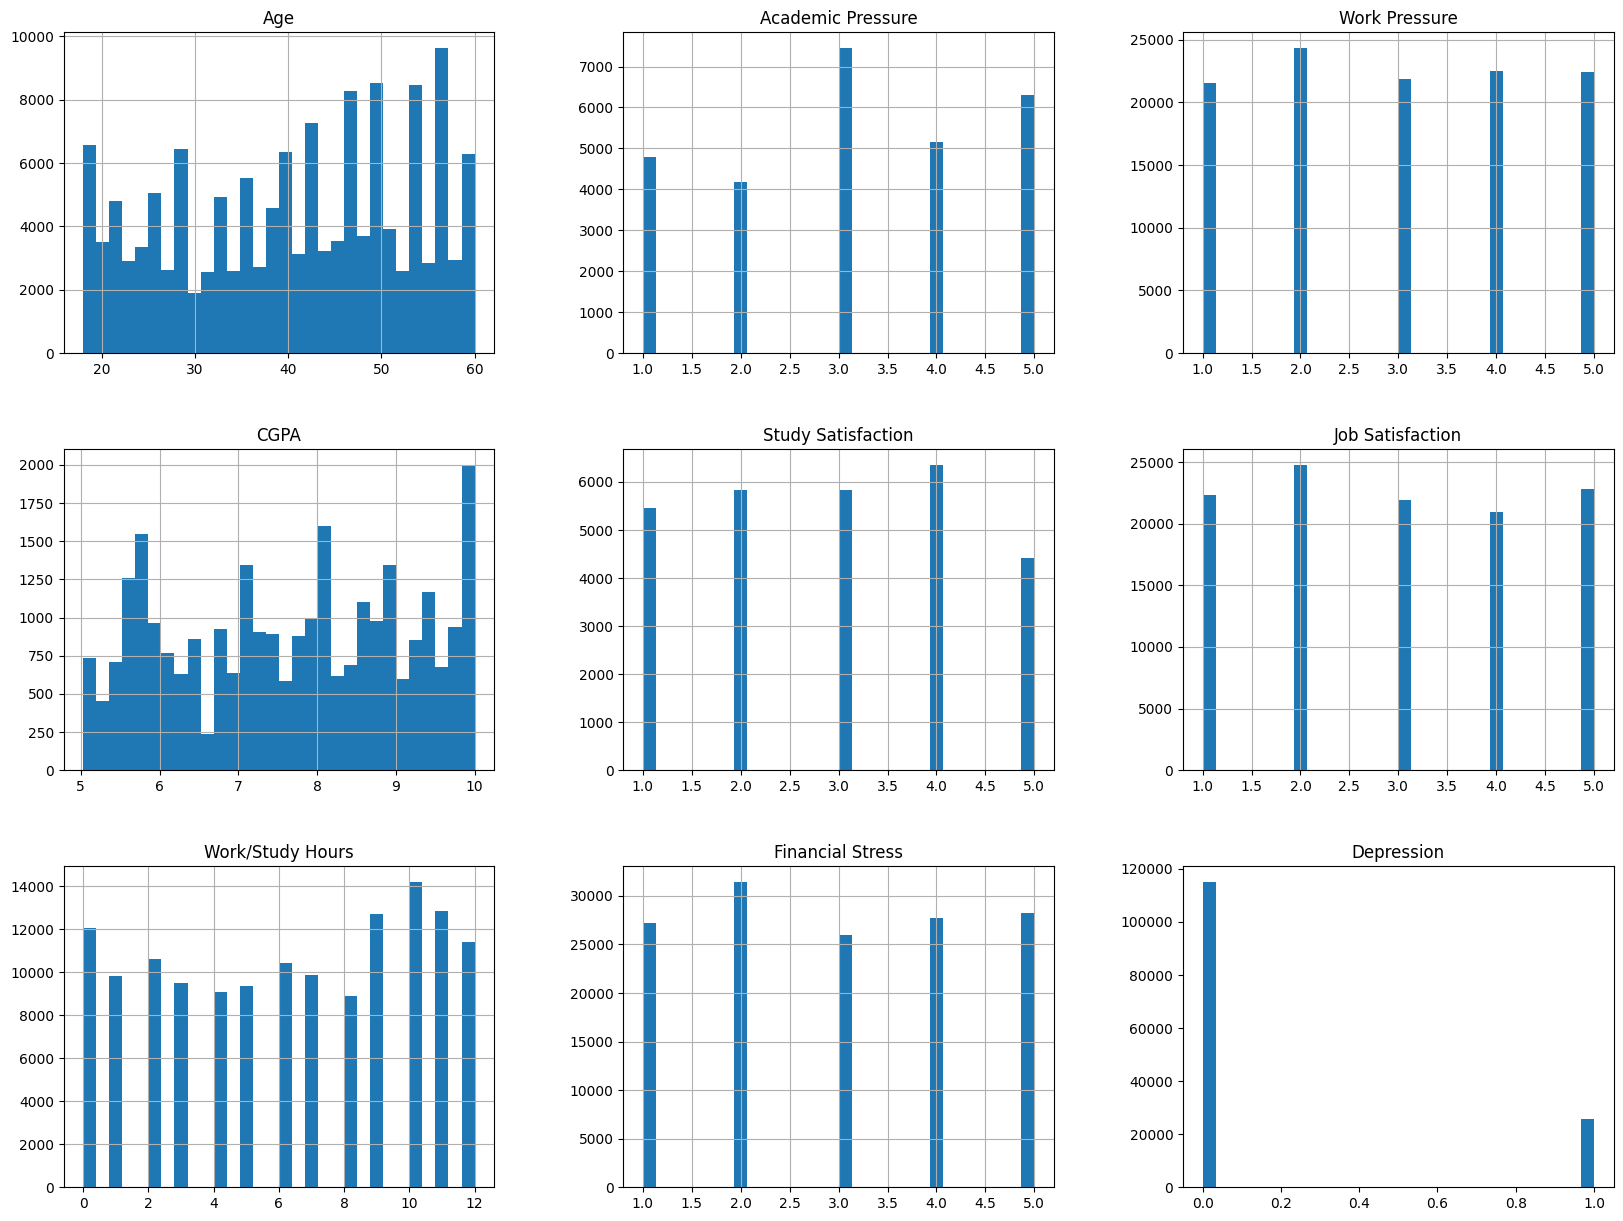

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_ds.hist(bins=30, figsize=(20,15))
plt.grid(False)
plt.show()

In [ ]:
# skewness of the data
import scipy.stats as stats
train_ds.select_dtypes(include=['int64', 'float64']).skew()

,0
Age,-0.217977
Academic Pressure,-0.133977
Work Pressure,0.018515
CGPA,-0.073636
Study Satisfaction,0.011764
Job Satisfaction,0.054361
Work/Study Hours,-0.128169
Financial Stress,0.035603
Depression,1.650852


In [ ]:
# specifying the numerical and categorical columns
numerical_cols = train_ds.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_ds.select_dtypes(include=['object']).columns

print(f'Numerical columns: {numerical_cols}')
print(f'Categorical columns: {categorical_cols}')

Numerical columns: Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')
Categorical columns: Index(['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


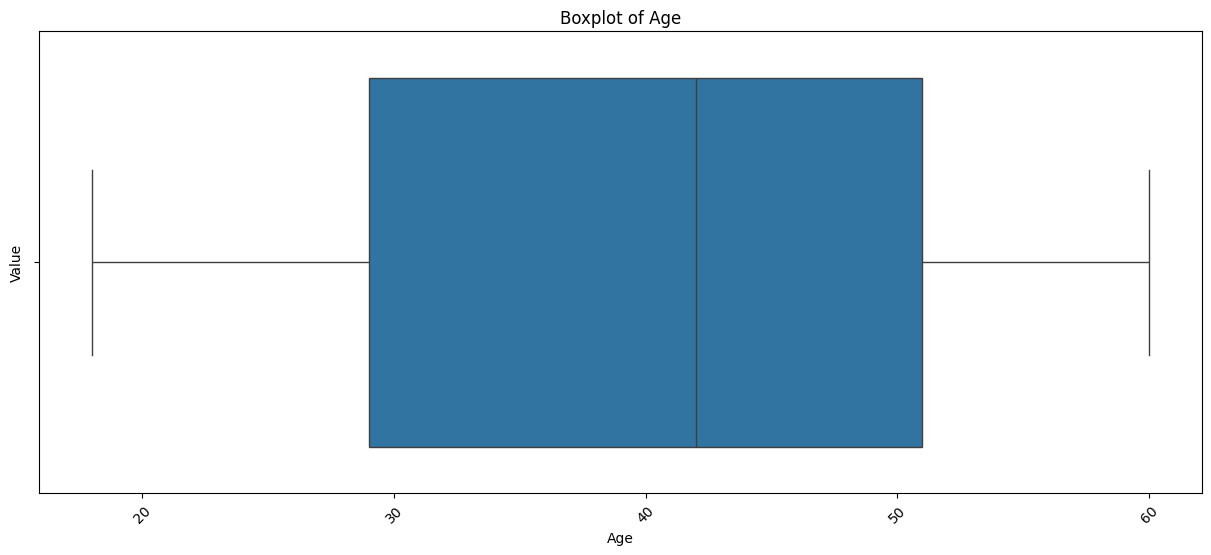

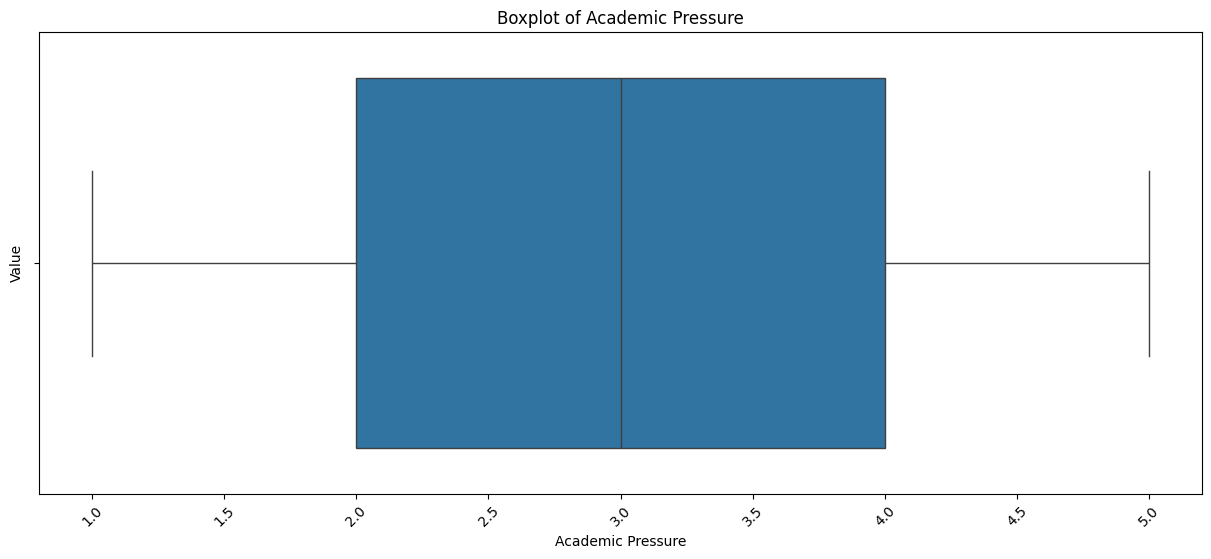

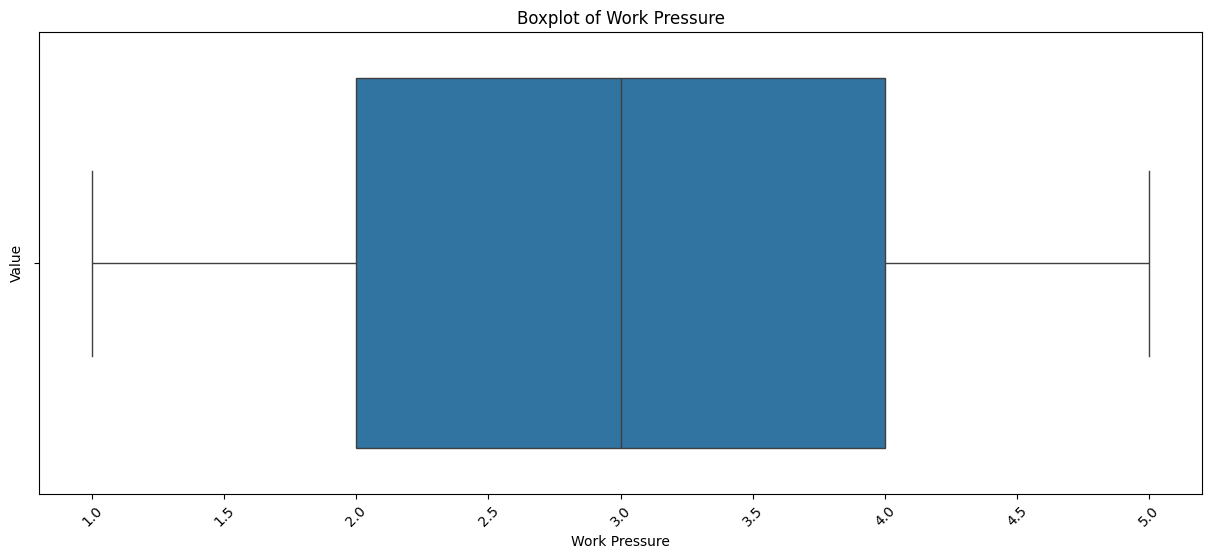

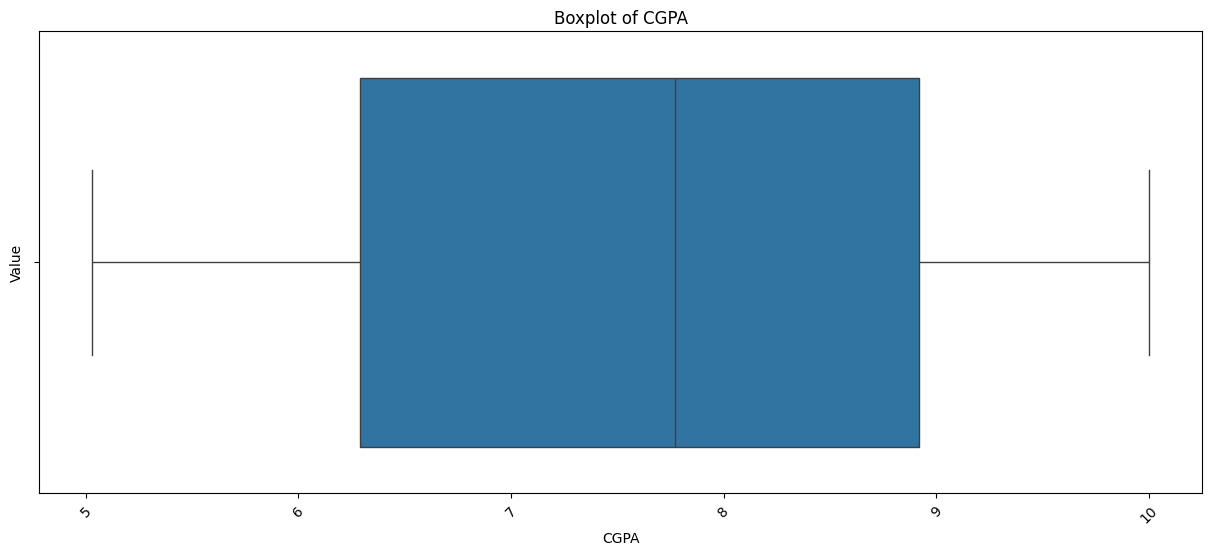

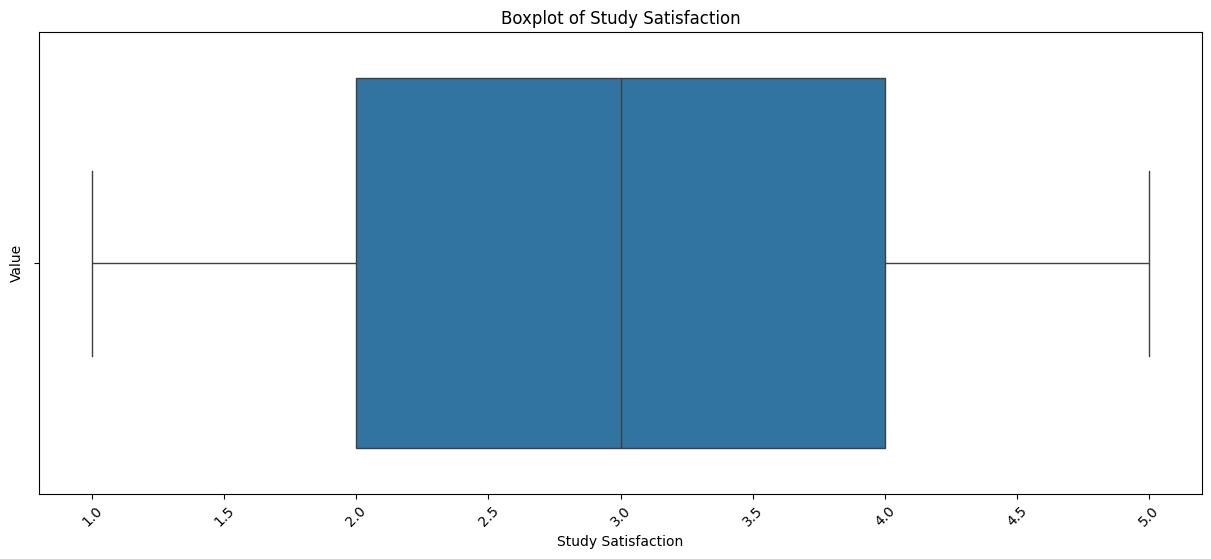

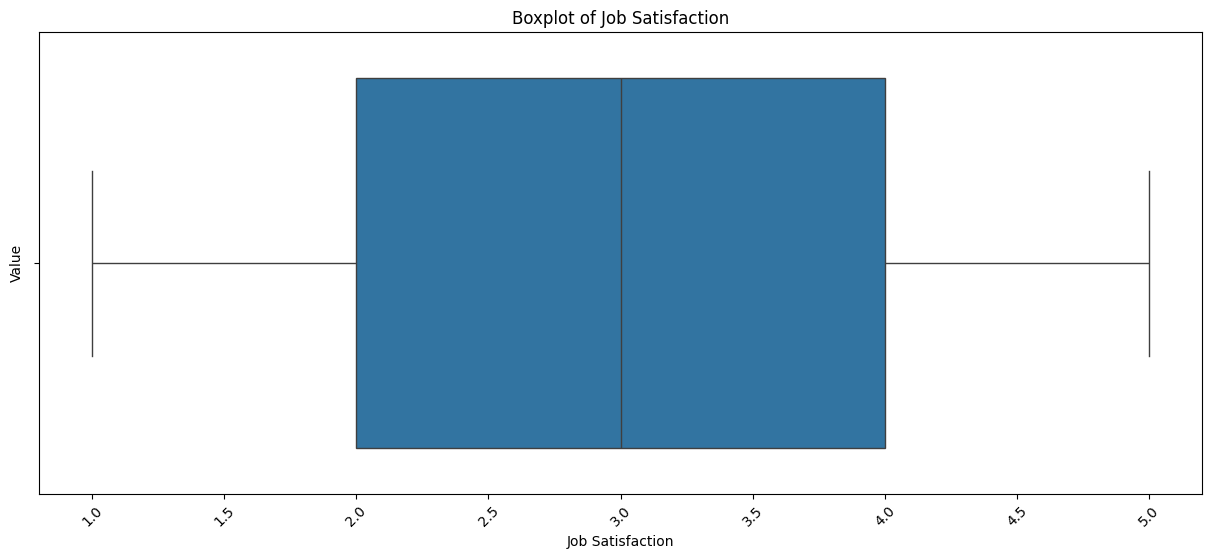

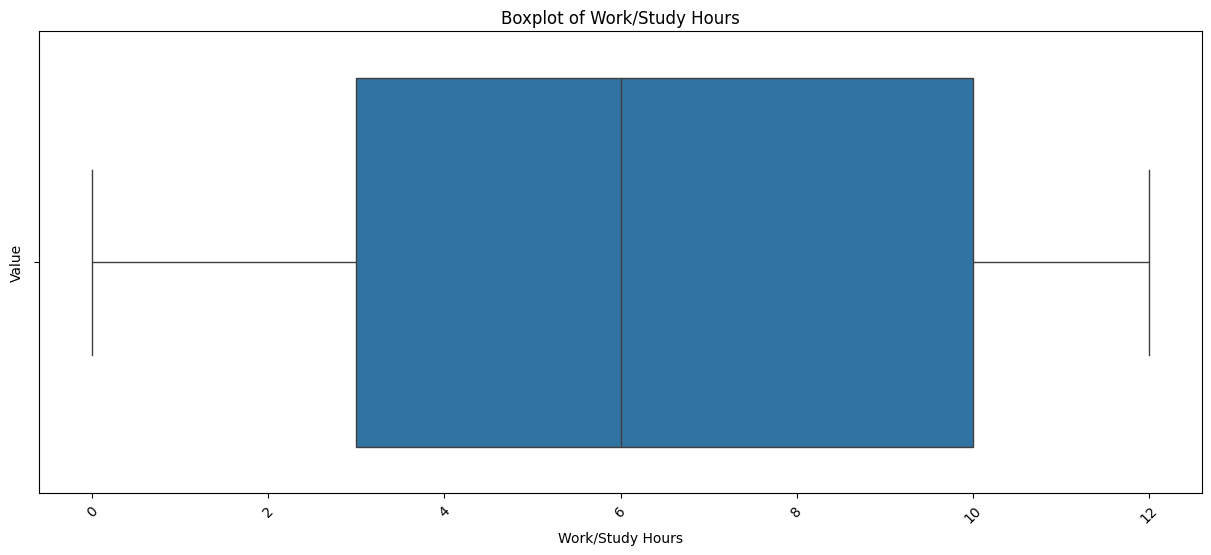

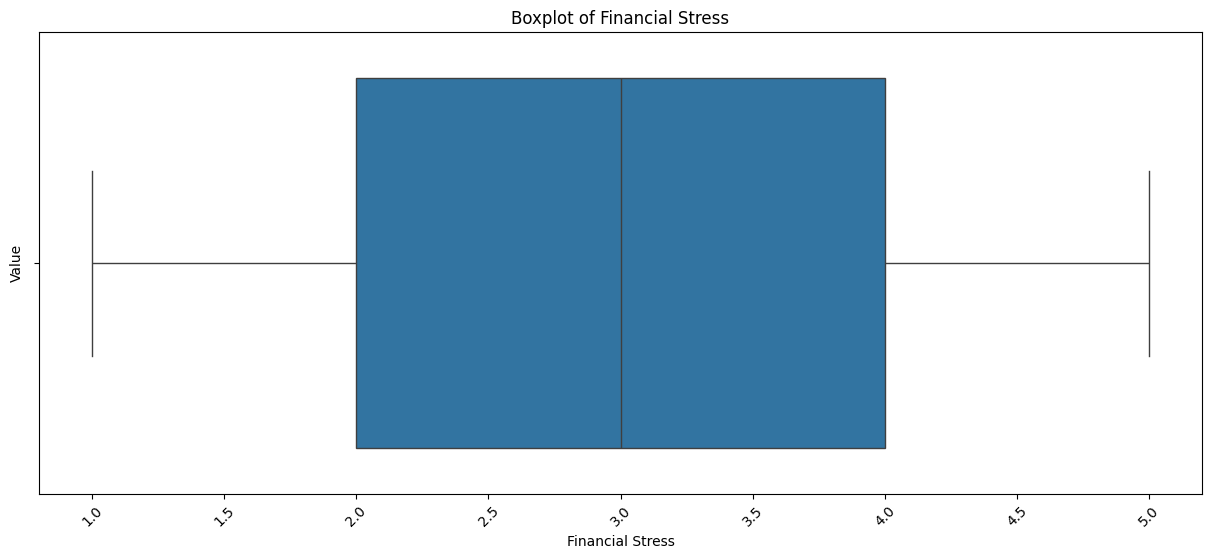

In [ ]:
# plot the numerical column using the boxplot
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress']

for i, column in enumerate(num_cols):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=train_ds, x=column)
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

## Exploring categorical column

In [ ]:
# converting categorical column to category
train_ds[categorical_cols] = train_ds[categorical_cols].astype('category')
test_ds[categorical_cols] = test_ds[categorical_cols].astype('category')

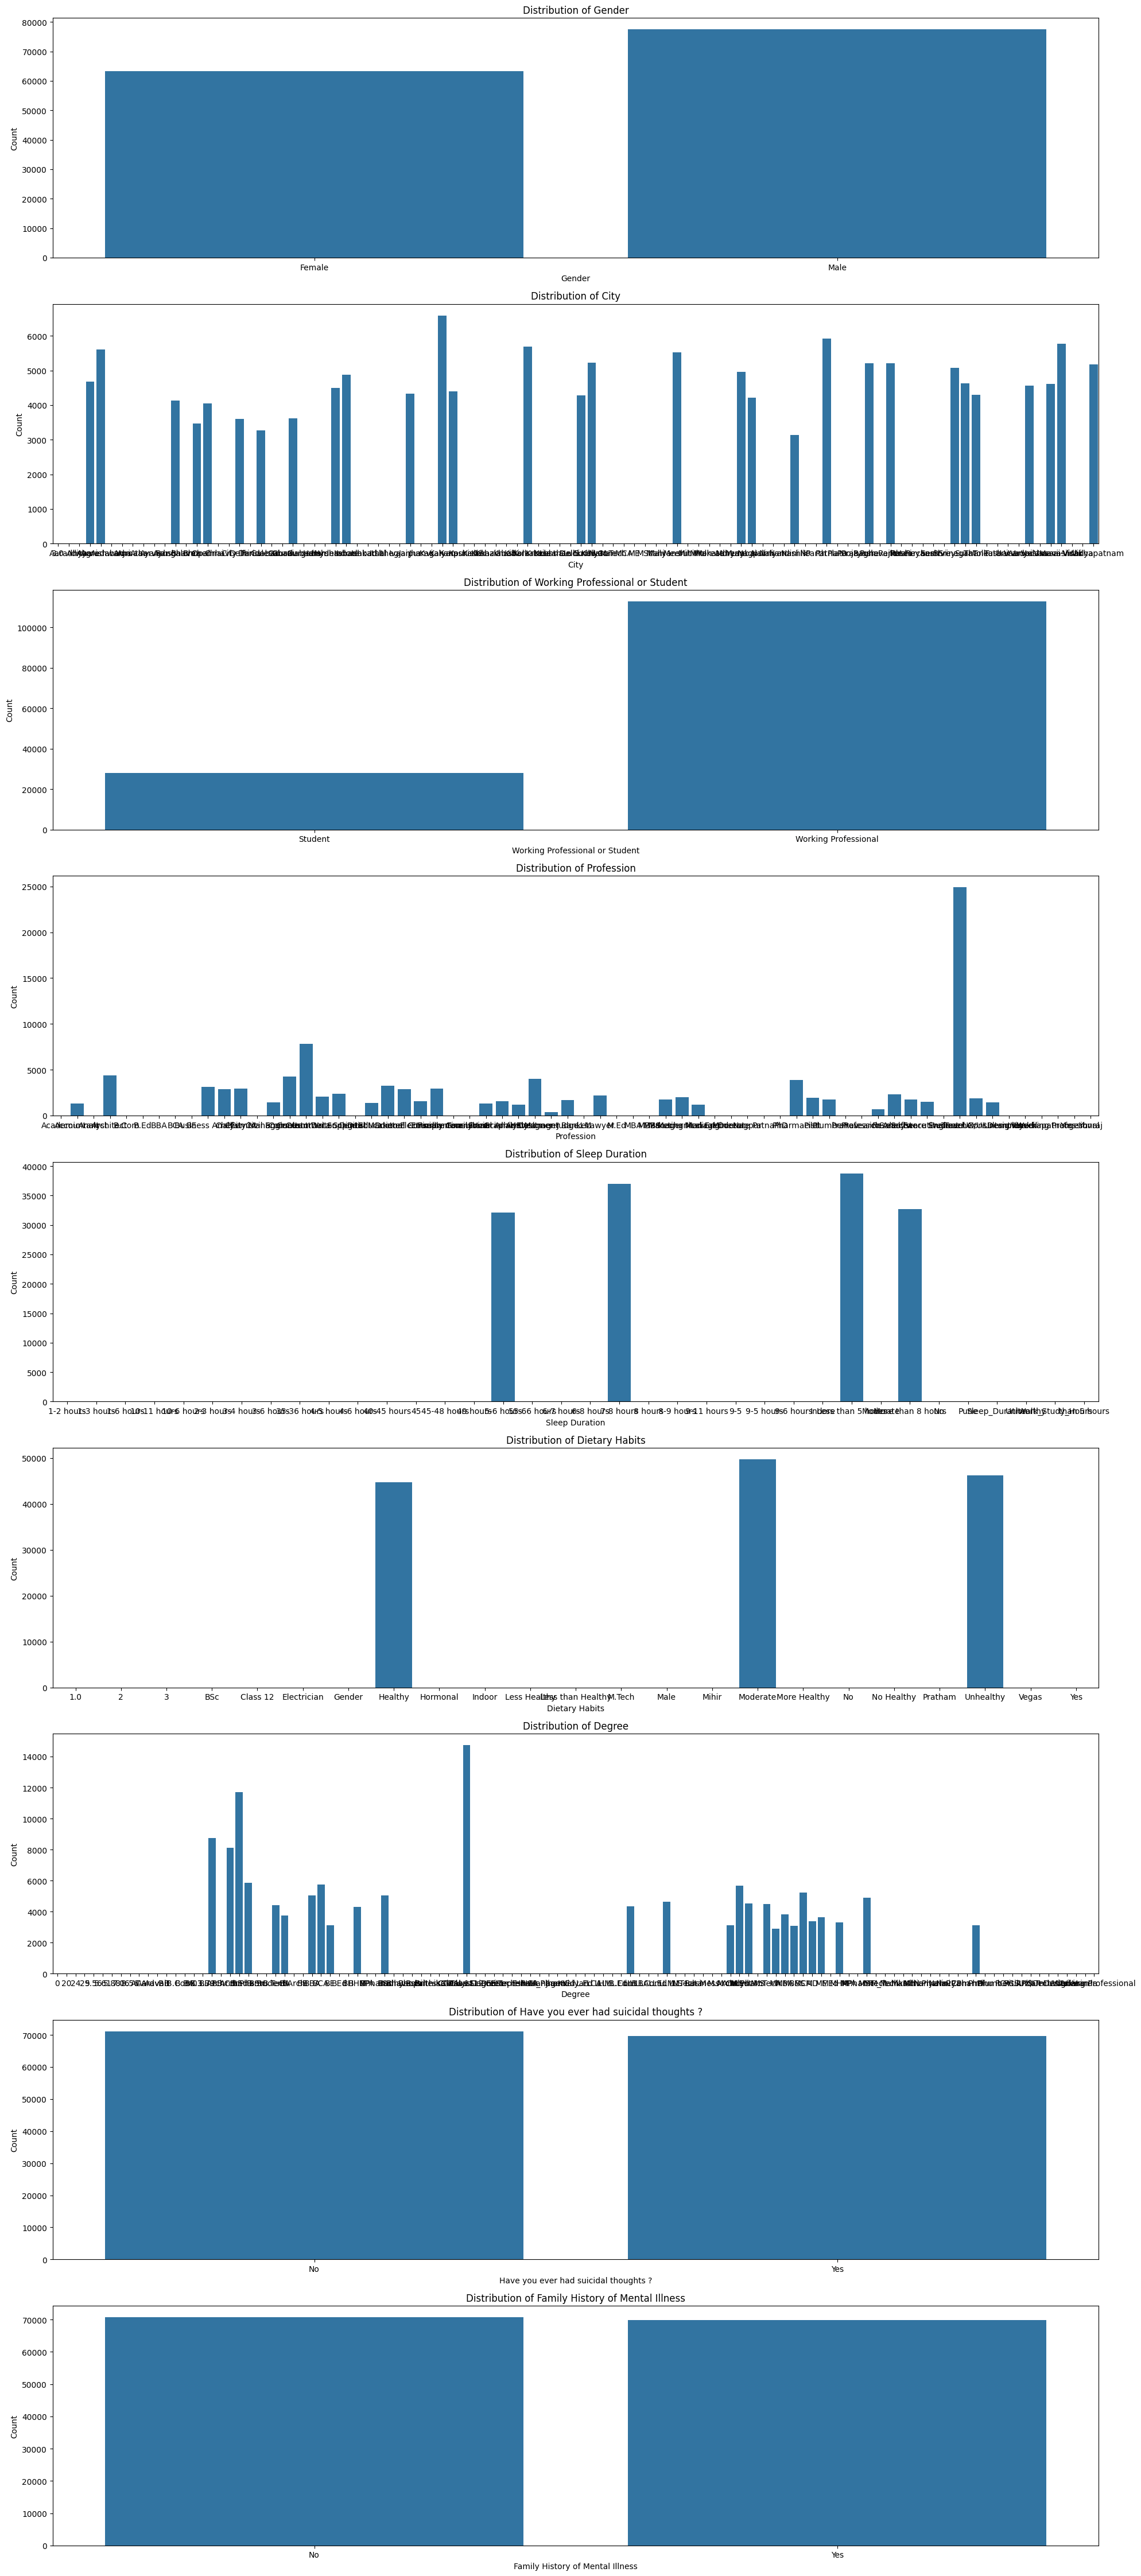

In [ ]:
import seaborn as sns

# plot the categorical column using countplot
cat_cols = ['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness']
num_cols = len(cat_cols)
num_rows = num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(8, 5 * num_rows))



for i, col in enumerate(cat_cols):
    sns.countplot(data=train_ds, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

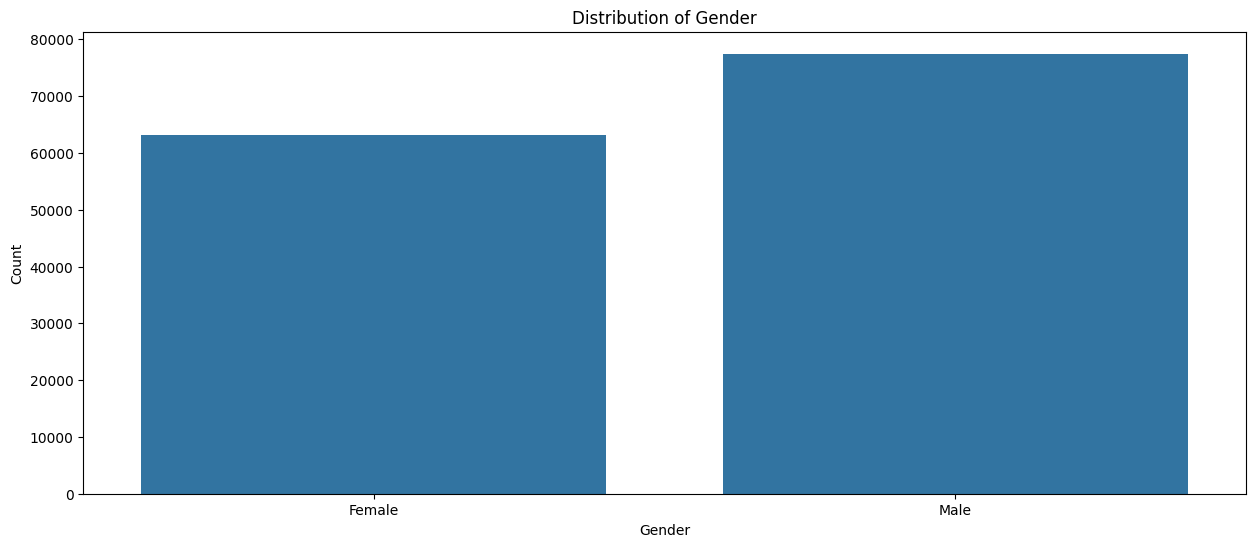

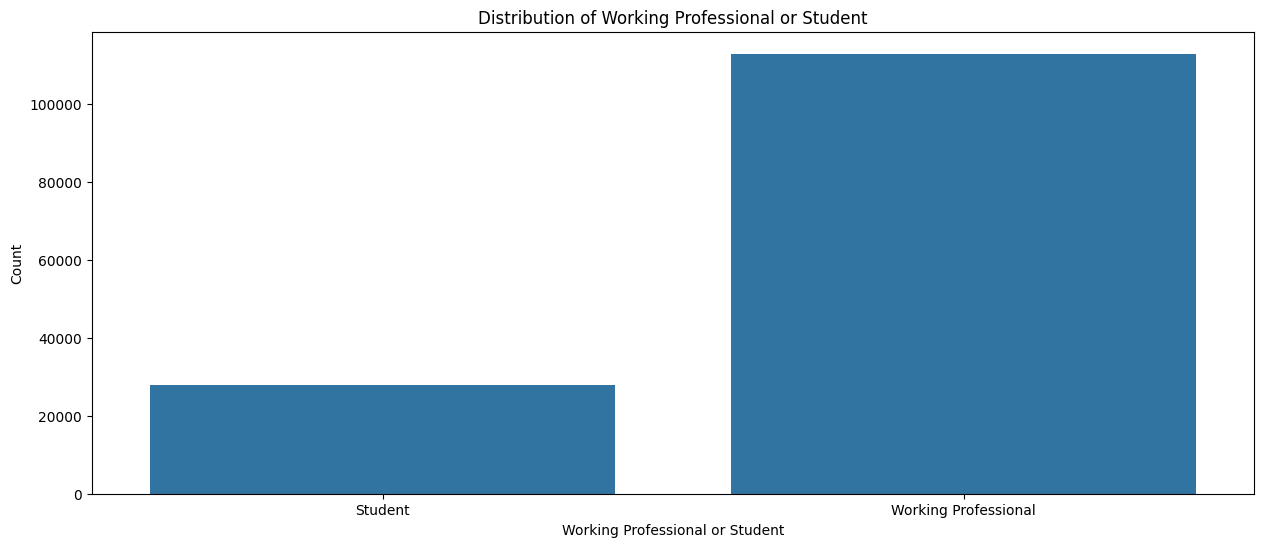

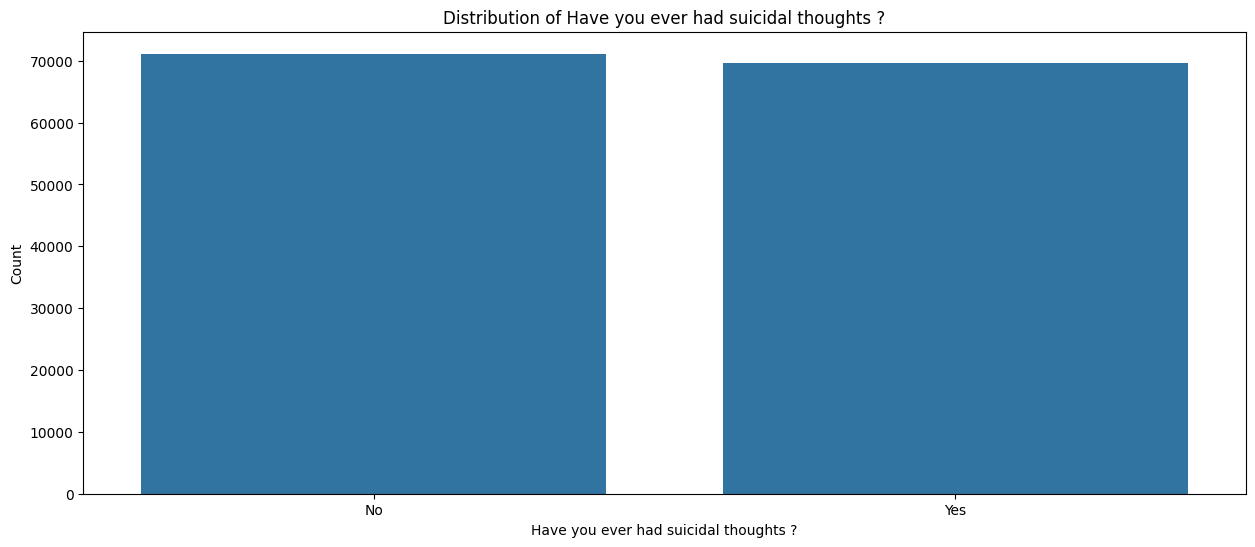

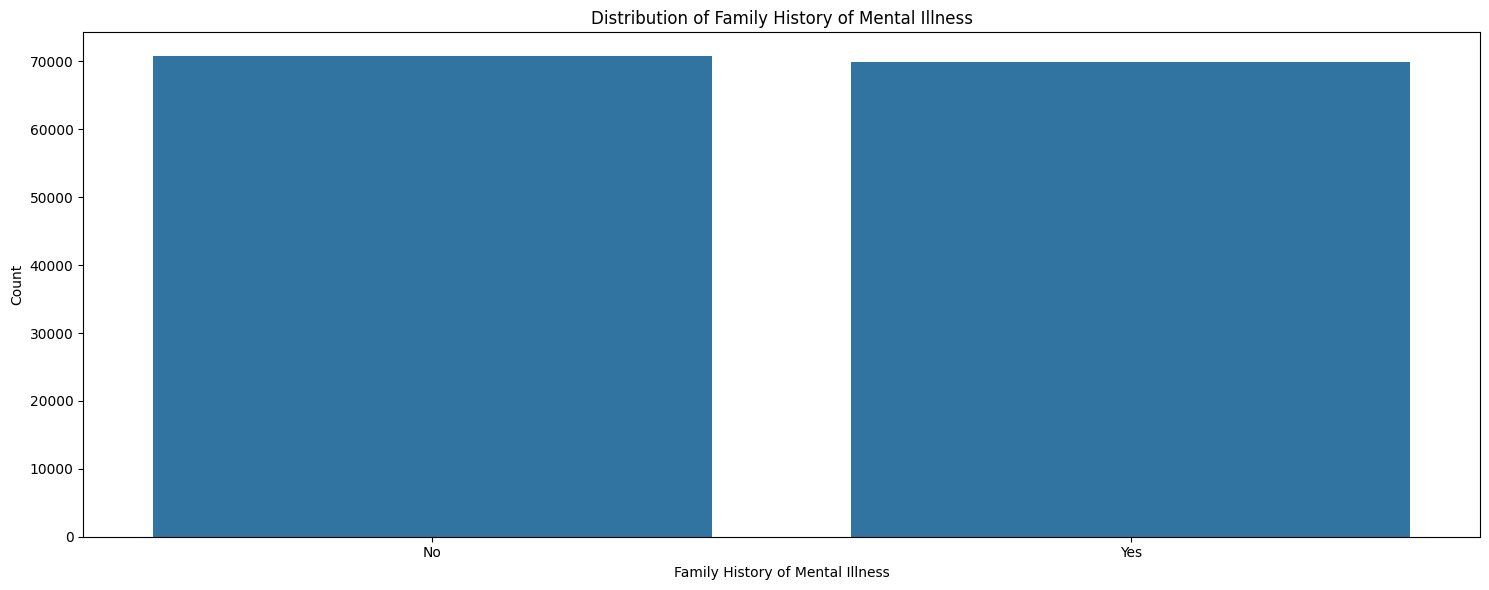

In [ ]:
# plot the categorical column using countplot
cat_cols = ['Gender', 'Working Professional or Student',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness']

for col in cat_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=train_ds, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Data cleaning and preprocessing

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
train_ds.shape

(140700, 20)

In [ ]:
X_train = train_ds.drop('Depression', axis=1)
X_test = test_ds
y_train = train_ds['Depression']



In [ ]:
X_train.shape

(140700, 20)

In [ ]:
X_test.shape

(93800, 19)

In [ ]:
X_train['Sleep Duration'].unique()

['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours', 'Sleep_Duration', ..., '3-6 hours', '45-48 hours', '9-5', 'Pune', '9-5 hours']
Length: 36
Categories (36, object): ['1-2 hours', '1-3 hours', '1-6 hours', '10-11 hours', ...,
                          'Sleep_Duration', 'Unhealthy', 'Work_Study_Hours', 'than 5 hours']

In [ ]:
X_train['Work Pressure'].unique()

array([ 5.,  4., nan,  1.,  2.,  3.])

In [ ]:
X_train['Dietary Habits'].value_counts()

,count
Dietary Habits,
Moderate,49705
Unhealthy,46227
Healthy,44741
Yes,2
No,2
More Healthy,2
M.Tech,1
Vegas,1
Pratham,1


In [ ]:
print(X_train['Degree'].unique())

['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', ..., 'LCA', 'B B.Com', 'RCA', 'Mihir', 'Advait']
Length: 116
Categories (115, object): ['0', '20', '24', '29', ..., 'Veda', 'Vivaan', 'Vrinda',
                           'Working Professional']


In [ ]:
# make pipeline for numerical and categorical
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing_value')),
    ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

ordinal_features = ['Sleep Duration', 'Dietary Habits', 'Academic Pressure', 'Work Pressure']  # Add other ordinal features
sleep_duration_order = ['Less than 6 hours', '6-8 hours', '8-10 hours', 'More than 10 hours']
dietary_habits_order = ['Unhealthy', 'Average', 'Healthy']  # Example order, adjust as needed
academic_pressure_order = ['Low', 'Medium', 'High']  # Example order, adjust as needed
work_pressure_order = ['Low', 'Medium', 'High']  # Example order, adjust as needed

ordinal_categories = [sleep_duration_order, dietary_habits_order, academic_pressure_order, work_pressure_order]  # Add other ordinal feature orders

ordinal_pipeline = Pipeline([
       ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most_frequent for ordinal features
       ('ordinal', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1))
   ])
# Combine the pipelines using ColumnTransformer
numerical_cols = [col for col in numerical_cols if col in X_train.columns]
categorical_cols = [col for col in categorical_cols if col in X_train.columns]

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols),
    ('ordinal', ordinal_pipeline, ordinal_features)
], remainder='passthrough') # This will ignore the remaining column

# drop the column


# Fit and transform the train and test data
X_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)




In [ ]:
# checking the code before is properly working
X_preprocessed.shape

(140700, 359)

In [ ]:
# Remove the outliers in the data
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=0)
model.fit(X_preprocessed)

predictions = model.predict(X_preprocessed)

outliers = X_train[predictions == -1]

print(f'Number of outliers: {len(outliers)}')


Number of outliers: 1407


In [ ]:
# Filter out the outliers
X_preprocessed = X_preprocessed[predictions == 1]
y_train = y_train[predictions == 1]

## Experimenting with the data cleaning method

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_ds[numerical_cols] = imputer.fit_transform(train_ds[numerical_cols])

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest()
model.fit(train_ds[numerical_cols])

predictions = model.predict(train_ds[numerical_cols])

outliers = train_ds[predictions == -1]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 50538


In [ ]:
Catcols = train_ds.select_dtypes(include=['object']).columns

In [ ]:
Catcols.isnull().sum()

0

## Feature Engineering

### Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes('category'):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    # Convert target variable to numerical using LabelEncoder if it contains strings
    if y.dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=True)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

In [ ]:
X_1 = train_ds.select_dtypes(include=['int64', 'float64']).drop('Depression', axis=1)
y_1 = train_ds['Depression']

In [ ]:
mi_scores = make_mi_scores(X_1, y_1)

id                    0.000000
Work/Study Hours      0.023897
Financial Stress      0.026086
Job Satisfaction      0.059341
Work Pressure         0.073375
Study Satisfaction    0.085574
Academic Pressure     0.093482
CGPA                  0.112040
Age                   0.202161
Name: MI Scores, dtype: float64


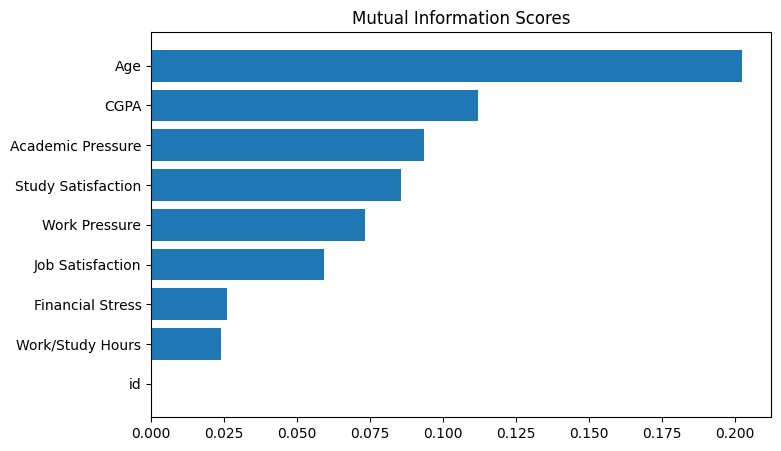

In [ ]:
print(mi_scores.head(20))

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

## PCA for dimensionality reduction

In [ ]:
# using PCA for feature selection before adding pre-processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate the features and target variable
X_2 = train_ds.select_dtypes(include=np.number).drop('Depression', axis=1)
y_2 = train_ds['Depression']

# scale the data
scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_2)

# Apply PCA
pca = PCA()
X_1_pca = pca.fit_transform(X_1_scaled)

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

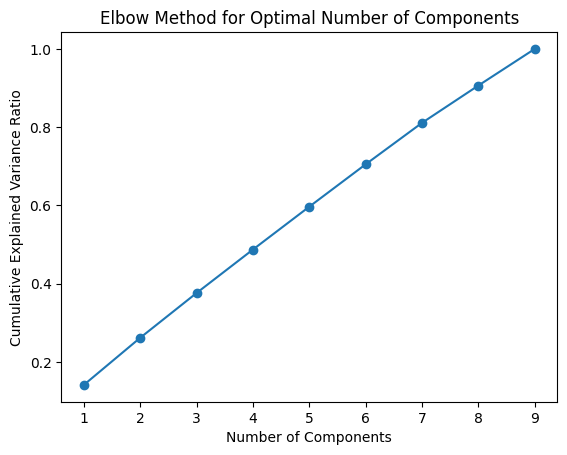

In [ ]:
# Determine the optimal number of component using the elbow method:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Elbow Method for Optimal Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

In [ ]:
# Refit PCA with the chosen number of components:
best_pca = PCA(0.95) # 95% representation of the data
X_1_best_pca = best_pca.fit_transform(X_1_scaled)

In [ ]:
# view the dimension of the data transform
print('original shape: ', X_1_scaled.shape)
print('transformed shape: ', X_1_best_pca.shape)

original shape:  (140700, 9)
transformed shape:  (140700, 9)


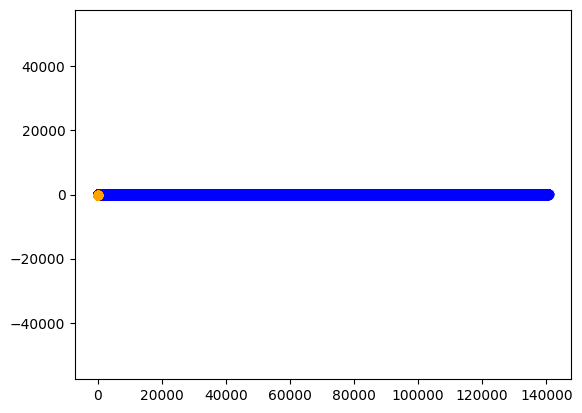

In [ ]:
# to understand the effect of the dimensionality reduction, we can perform the inverse transform
pca_new = best_pca.inverse_transform(X_1_best_pca)
plt.scatter(X_2.iloc[:, 0], X_2.iloc[:, 1], alpha=0.2, c='blue')
plt.scatter(pca_new[:, 0], pca_new[:, 1], alpha=0.8, c='orange')
plt.axis('equal');

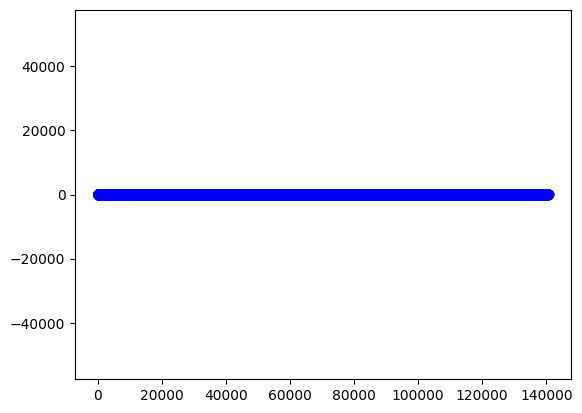

In [ ]:
plt.scatter(pca_new[:, 0], pca_new[:, 1], alpha=0.8, c='orange')
plt.scatter(X_2.iloc[:, 0], X_2.iloc[:, 1], alpha=0.2, c='blue')

plt.axis('equal');

In [ ]:
# explained variance ratio
best_pca.explained_variance_ratio_

array([0.14112858, 0.12045657, 0.1144425 , 0.11108951, 0.10958509,
       0.10831152, 0.10599186, 0.09540152, 0.09359286])

In [ ]:
# number of the columns that having 95% of the data representation
len(best_pca.explained_variance_ratio_)

9

# Finding best classifier for depression

## Using Catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

# Split preprocessed data into training and validation sets
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_preprocessed, y_train, test_size=0.2, random_state=42
)

In [ ]:
from catboost import CatBoostClassifier

# Initialize the CatBoostClassifier with desired parameters
model = CatBoostClassifier(iterations=1500,  # Number of boosting iterations
                          learning_rate=0.05,  # Step size at each iteration
                          depth=4,  # Depth of the trees
                          loss_function='Logloss',  # Loss function for binary classification
                          eval_metric='AUC',  # Evaluation metric
                          random_seed=42,  # Random seed for reproducibility
                          verbose=100,
                         )

# Train the model
model.fit(X_train_final, y_train_final, eval_set=(X_val_final, y_val_final))

0:	test: 0.9414826	best: 0.9414826 (0)	total: 139ms	remaining: 3m 27s
100:	test: 0.9728421	best: 0.9728421 (100)	total: 3.77s	remaining: 52.2s
200:	test: 0.9744919	best: 0.9744919 (200)	total: 6.38s	remaining: 41.3s
300:	test: 0.9749408	best: 0.9749413 (298)	total: 8.95s	remaining: 35.7s
400:	test: 0.9751875	best: 0.9751909 (396)	total: 11.6s	remaining: 31.7s
500:	test: 0.9753371	best: 0.9753371 (498)	total: 16.2s	remaining: 32.3s
600:	test: 0.9754160	best: 0.9754160 (600)	total: 18.8s	remaining: 28.1s
700:	test: 0.9754957	best: 0.9754970 (692)	total: 21.4s	remaining: 24.3s
800:	test: 0.9755452	best: 0.9755452 (799)	total: 24s	remaining: 20.9s
900:	test: 0.9755628	best: 0.9755680 (881)	total: 27.7s	remaining: 18.4s
1000:	test: 0.9755909	best: 0.9755914 (938)	total: 31.2s	remaining: 15.5s
1100:	test: 0.9756073	best: 0.9756134 (1083)	total: 33.7s	remaining: 12.2s
1200:	test: 0.9756133	best: 0.9756198 (1191)	total: 36.4s	remaining: 9.05s
1300:	test: 0.9756112	best: 0.9756198 (1191)	total:

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
y_pred = model.predict(X_val_final)

# Evaluate the model's performance (here, using accuracy as an example)
accuracy = accuracy_score(y_val_final, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9391579022936932


## Using XGBoostClassifier

In [ ]:
!pip install xgboost

In [ ]:
# use XGBoostClassifier
from xgboost import XGBClassifier

# Initialize the XGBoost classifier with desired parameters
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage used in update to prevents overfitting
    max_depth=3,  # Maximum depth of a tree
    objective='binary:logistic',  # Loss function for binary classification
    random_state=42,  # Random seed for reproducibility
)


In [ ]:
# train the model
xgb_model.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# make prediction
y_pred = xgb_model.predict(X_val_final)

In [ ]:
# evaluate the model
accuracy = accuracy_score(y_val_final, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9367529344197566


## using lightGBM

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
      n_estimators=100,
      learning_rate=0.1,
      max_depth=3,
      objective='binary',
      random_state=42
)

lgb_model.fit(X_train_final, y_train_final)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 20264, number of negative: 91170
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 111434, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181848 -> initscore=-1.503880
[LightGBM] [Info] Start training from score -1.503880
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier(max_depth=3, objective='binary', random_state=42)

In [ ]:
# make prediction
y_pred = lgb_model.predict(X_val_final)

In [ ]:
# evaluate the model
accuracy = accuracy_score(y_val_final, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9367888294626512


## use Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
      n_estimators=100,
      max_depth=None,
      random_state=42
      )

rf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [ ]:
# make prediction
y_pred = rf_model.predict(X_val_final)

# evaluate the model
accuracy = accuracy_score(y_val_final, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9321583689292509


## use SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_final, y_train_final)

SVC(kernel='linear', random_state=42)

In [ ]:
# make prediction
y_pred = svm_model.predict(X_val_final)

# evaluate the model
accuracy = accuracy_score(y_val_final, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9383682113500126


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

model = CatBoostClassifier(
       loss_function='Logloss',
       eval_metric='AUC',
       random_seed=42,
       verbose=100,
   )

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=model,  # Your CatBoostClassifier instance
    param_grid=param_grid,
    scoring='accuracy',  # Or another relevant metric
    cv=5,  # Number of cross-validation folds
    verbose=2
)

# Fit the grid search to your data
grid_search.fit(X_train_final, y_train_final)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0:	total: 23.8ms	remaining: 11.9s
100:	total: 1.96s	remaining: 7.76s
200:	total: 3.89s	remaining: 5.79s
300:	total: 5.78s	remaining: 3.82s
400:	total: 9.1s	remaining: 2.25s
499:	total: 11.5s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  30.0s
0:	total: 20.6ms	remaining: 10.3s
100:	total: 1.99s	remaining: 7.85s
200:	total: 3.95s	remaining: 5.87s
300:	total: 6.18s	remaining: 4.09s
400:	total: 9.83s	remaining: 2.43s
499:	total: 11.7s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  28.4s
0:	total: 18.5ms	remaining: 9.24s
100:	total: 1.95s	remaining: 7.71s
200:	total: 3.85s	remaining: 5.72s
300:	total: 7.07s	remaining: 4.68s
400:	total: 9.65s	remaining: 2.38s
499:	total: 11.5s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  28.7s
0:	total: 18.8ms	remaining: 9.38s
100:	total: 1.97s	re

In [ ]:
# use the best param into the model GridSearch hyperparameter tuning
model = CatBoostClassifier(
       loss_function='Logloss',
       eval_metric='AUC',
       random_seed=42,
       verbose=100,
       iterations=1500,
       learning_rate=0.05,
       depth=4,
       l2_leaf_reg=3
   )

# Train the model
model.fit(X_train_final, y_train_final, eval_set=(X_val_final, y_val_final))

0:	test: 0.9414826	best: 0.9414826 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.9728421	best: 0.9728421 (100)	total: 4.86s	remaining: 1m 7s
200:	test: 0.9744919	best: 0.9744919 (200)	total: 7.61s	remaining: 49.2s
300:	test: 0.9749408	best: 0.9749413 (298)	total: 10.2s	remaining: 40.7s
400:	test: 0.9751875	best: 0.9751909 (396)	total: 12.8s	remaining: 35.2s
500:	test: 0.9753371	best: 0.9753371 (498)	total: 16.2s	remaining: 32.4s
600:	test: 0.9754160	best: 0.9754160 (600)	total: 20s	remaining: 30s
700:	test: 0.9754957	best: 0.9754970 (692)	total: 22.6s	remaining: 25.8s
800:	test: 0.9755452	best: 0.9755452 (799)	total: 25.3s	remaining: 22.1s
900:	test: 0.9755628	best: 0.9755680 (881)	total: 27.9s	remaining: 18.6s
1000:	test: 0.9755909	best: 0.9755914 (938)	total: 32.7s	remaining: 16.3s
1100:	test: 0.9756073	best: 0.9756134 (1083)	total: 35.3s	remaining: 12.8s
1200:	test: 0.9756133	best: 0.9756198 (1191)	total: 37.9s	remaining: 9.45s
1300:	test: 0.9756112	best: 0.9756198 (1191)	total: 4

In [ ]:
# test predictions
test_predictions = model.predict(X_test_preprocessed)

In [ ]:
# evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_val_final)
accuracy = accuracy_score(y_val_final, y_pred)
precision = precision_score(y_val_final, y_pred)
recall = recall_score(y_val_final, y_pred)
f1 = f1_score(y_val_final, y_pred)
auc = roc_auc_score(y_val_final, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")


Accuracy: 0.9391579022936932
Precision: 0.8399585921325051
Recall: 0.8148222534645511
F1 Score: 0.8271995106534815
AUC: 0.8905186442147929


# Sample Submission

In [ ]:
test_ds = pd.read_csv('test.csv')
test_ds.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [ ]:
output = pd.DataFrame({'id': test_ds['id'], 'Depression': test_predictions})
output.to_csv('submission.csv', index=False)
output.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
